# Book System Recomendation 


In [1]:
import pandas as pd 

In [2]:
books = pd.read_csv(r"Data\Books.csv" , encoding="latin1")
ratings = pd.read_csv(r"Data\Ratings.csv",encoding="latin1")
users = pd.read_csv(r"Data\Users.csv",encoding="latin1")

C:\Users\toran\AppData\Local\Temp\ipykernel_5252\1927231135.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(r"Data\Books.csv" , encoding="latin1")


In [3]:
books_head = books.head()
ratings_head = ratings.head()
users_head = users.head()

books_head, ratings_head, users_head

(         ISBN                                         Book-Title  \
 0  0195153448                                Classical Mythology   
 1  0002005018                                       Clara Callan   
 2  0060973129                               Decision in Normandy   
 3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
 4  0393045218                             The Mummies of Urumchi   
 
             Book-Author Year-Of-Publication                   Publisher  \
 0    Mark P. O. Morford                2002     Oxford University Press   
 1  Richard Bruce Wright                2001       HarperFlamingo Canada   
 2          Carlo D'Este                1991             HarperPerennial   
 3      Gina Bari Kolata                1999        Farrar Straus Giroux   
 4       E. J. W. Barber                1999  W. W. Norton &amp; Company   
 
                                          Image-URL-S  \
 0  http://images.amazon.com/images/P/0195153448.0...   
 1  http://i

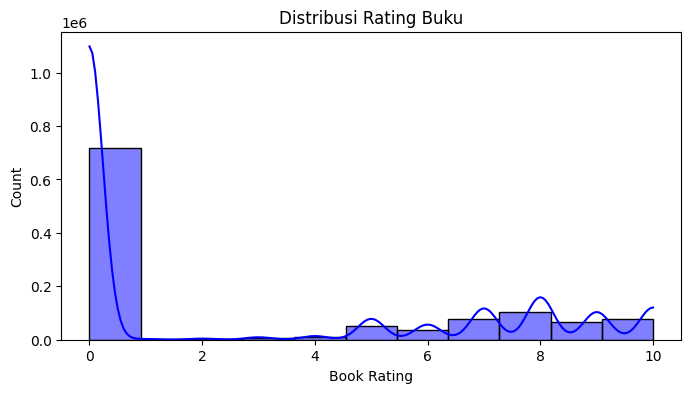

(46117,
 ISBN
 0971880107    2502
 0316666343    1295
 0385504209     883
 0060928336     732
 0312195516     723
 044023722X     647
 0679781587     639
 0142001740     615
 067976402X     614
 0671027360     586
 Name: count, dtype: int64)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengecek distribusi rating
plt.figure(figsize=(8, 4))
sns.histplot(ratings["Book-Rating"], bins=11, kde=True, color="blue")
plt.xlabel("Book Rating")
plt.ylabel("Count")
plt.title("Distribusi Rating Buku")
plt.show()

# Mengecek jumlah pengguna yang memberikan rating lebih dari 1 kali
user_rating_counts = ratings["User-ID"].value_counts()
active_users = (user_rating_counts > 1).sum()

# Buku paling populer berdasarkan jumlah rating yang diberikan
popular_books = ratings["ISBN"].value_counts().head(10)

active_users, popular_books


In [5]:
books_df_cleaned = books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])
users_df_cleaned = users.copy()
users_df_cleaned["Age"].fillna(users_df_cleaned["Age"].median(), inplace=True)
books_df_cleaned.info(), users_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


C:\Users\toran\AppData\Local\Temp\ipykernel_5252\931403238.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users_df_cleaned["Age"].fillna(users_df_cleaned["Age"].median(), inplace=True)


(None, None)

In [6]:
ratings_books_merged = ratings.merge(books_df_cleaned, on="ISBN", how="left")
final_dataset = ratings_books_merged.merge(users_df_cleaned, on="User-ID", how="left")
final_dataset.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",32.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,"seattle, washington, usa",32.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,"rijeka, n/a, croatia",16.0


In [7]:
final_dataset.describe()

,User-ID,Book-Rating,Age
count,1.149780e+06,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00,3.582932e+01
std,8.056228e+04,3.854184e+00,1.239898e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00,3.100000e+01
50%,1.410100e+05,0.000000e+00,3.200000e+01
75%,2.110280e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,2.440000e+02


In [8]:
Q1 = final_dataset.Age.quantile(0.25)
Q3 = final_dataset.Age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = final_dataset[(final_dataset.Age < lower_bound) | (final_dataset.Age > upper_bound)]
print(outliers)

final_dataset = final_dataset[(final_dataset.Age >= lower_bound) & (final_dataset.Age <= upper_bound)]

         User-ID         ISBN  Book-Rating  \
7         276737   0600570967            6   
107       276804   0064405176            0   
108       276804   0439104769            0   
109       276804   0440498058            8   
133       276822   0060096195           10   
...          ...          ...          ...   
1149316   276647   0689822294           10   
1149334   276660   0583307841            8   
1149444   276675   0747252327            0   
1149778   276721   0590442449           10   
1149779   276723  05162443314            8   

                                              Book-Title         Book-Author  \
7                                                    NaN                 NaN   
107                                       Walk Two Moons       Sharon Creech   
108                                         Bloomability       Sharon Creech   
109                                    A Wrinkle In Time   MADELEINE L'ENGLE   
133                                    The Boy 

In [9]:
final_dataset.describe()

,User-ID,Book-Rating,Age
count,1.068863e+06,1.068863e+06,1.068863e+06
mean,1.398308e+05,2.882932e+00,3.433921e+01
std,8.096938e+04,3.856086e+00,8.292727e+00
min,2.000000e+00,0.000000e+00,1.600000e+01
25%,6.937800e+04,0.000000e+00,3.000000e+01
50%,1.390310e+05,0.000000e+00,3.200000e+01
75%,2.118620e+05,7.000000e+00,3.800000e+01
max,2.788540e+05,1.000000e+01,5.600000e+01


In [10]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068863 entries, 0 to 1149777
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1068863 non-null  int64  
 1   ISBN                 1068863 non-null  object 
 2   Book-Rating          1068863 non-null  int64  
 3   Book-Title           959226 non-null   object 
 4   Book-Author          959224 non-null   object 
 5   Year-Of-Publication  959226 non-null   object 
 6   Publisher            959224 non-null   object 
 7   Location             1068863 non-null  object 
 8   Age                  1068863 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 81.5+ MB


In [11]:
final_dataset.rename(columns ={"User-ID" : "User_ID" , "Book-Title" : "Book_Title" , "Book-Author" : "Book_Author" , "Year-Of-Publication" : "Year_Of_Publication" , "Publisher" : "Publisher" , "Book-Rating" : "Book_Rating"}, inplace=True)

In [12]:
final_dataset.Book_Rating.value_counts().unique()

array([663009,  97105,  72709,  71830,  63339,  47859,  34652,   8375,
         5682,   2612,   1691], dtype=int64)

In [13]:
final_dataset.drop(final_dataset[final_dataset.Book_Rating == 0].index, inplace=True)

In [14]:
# Hanya mempertimbangkan buku yang memiliki minimal 100 rating
book_rating_counts = final_dataset["ISBN"].value_counts()
popular_books = book_rating_counts[book_rating_counts >= 100].index
filtered_books = final_dataset[final_dataset["ISBN"].isin(popular_books)]

# Hanya mempertimbangkan pengguna yang telah memberikan minimal 5 rating
user_rating_counts = filtered_books["User_ID"].value_counts()
active_users = user_rating_counts[user_rating_counts >= 25].index
filtered_data = filtered_books[filtered_books["User_ID"].isin(active_users)]

In [15]:
filtered_data.describe()

,User_ID,Book_Rating,Age
count,337.000000,337.000000,337.000000
mean,72190.127596,7.851632,35.198813
std,70851.039138,1.751344,6.778309
min,6575.000000,1.000000,26.000000
25%,11676.000000,7.000000,32.000000
50%,60244.000000,8.000000,32.000000
75%,105979.000000,9.000000,33.000000
max,240567.000000,10.000000,47.000000


In [16]:
filtered_data.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Location,Age
28143,6575,0060502258,8,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch,"seattle, washington, usa",32.0
28155,6575,0060928336,8,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,"seattle, washington, usa",32.0
28161,6575,0060934417,9,Bel Canto: A Novel,Ann Patchett,2002,Perennial,"seattle, washington, usa",32.0
28174,6575,0060987103,9,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books,"seattle, washington, usa",32.0
28209,6575,014028009X,4,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,"seattle, washington, usa",32.0


In [17]:
filtered_data.Book_Title.unique()

array(['The Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Bel Canto: A Novel',
       'Wicked: The Life and Times of the Wicked Witch of the West',
       "Bridget Jones's Diary", "The Girls' Guide to Hunting and Fishing",
       'Bridget Jones: The Edge of Reason', 'The Secret Life of Bees',
       'The Red Tent (Bestselling Backlist)',
       'Four To Score (A Stephanie Plum Novel)', 'Me Talk Pretty One Day',
       'Midwives: A Novel', 'A Heartbreaking Work of Staggering Genius',
       'Confessions of a Shopaholic (Summer Display Opportunity)',
       "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
       'A Map of the World',
       'Balzac and the Little Chinese Seamstress : A Novel',
       'Message in a Bottle',
       "Where the Heart Is (Oprah's Book Club (Paperback))",
       'Girl with a Pearl Earring',
       'A Is for Alibi (Kinsey Millhone Mysteries (Paperback))',
       'T

In [18]:
filtered_data.shape

(337, 9)

In [19]:
filtered_data.User_ID.unique()

array([  6575,  11676,  16795,  60244,  95359, 104636, 105979, 135149,
       240567], dtype=int64)

In [20]:
filtered_data.isnull().sum()

User_ID                0
ISBN                   0
Book_Rating            0
Book_Title             4
Book_Author            4
Year_Of_Publication    4
Publisher              4
Location               0
Age                    0
dtype: int64

In [21]:
filtered_data.dropna(inplace=True)

C:\Users\toran\AppData\Local\Temp\ipykernel_5252\3097295424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.dropna(inplace=True)


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
tf.fit(filtered_data['Book_Title'])
tf.get_feature_names_out()

array(['1st', '45', '451', 'about', 'account', 'against', 'agency', 'air',
       'alchemist', 'alex', 'alibi', 'alienist', 'all', 'along', 'altars',
       'american', 'amp', 'an', 'and', 'angela', 'angels', 'animus',
       'ashes', 'azkaban', 'backlist', 'bad', 'balzac', 'be', 'bean',
       'bed', 'bees', 'beginning', 'behind', 'bel', 'bend', 'bestselling',
       'bible', 'bones', 'bonesetter', 'book', 'bottle', 'brethren',
       'bridges', 'bridget', 'brief', 'called', 'came', 'canto',
       'catcher', 'cedars', 'chamber', 'child', 'chinese', 'christmas',
       'chronicles', 'client', 'club', 'code', 'cold', 'come',
       'confessions', 'county', 'courage', 'cross', 'da', 'dark',
       'daughter', 'day', 'days', 'demons', 'detective', 'diaries',
       'diary', 'die', 'disaster', 'display', 'divine', 'dough', 'dream',
       'earring', 'earth', 'edge', 'empire', 'enchanting', 'ender',
       'evanovich', 'events', 'everest', 'everywhere', 'excuses', 'fable',
       'fahrenhe

In [23]:
tfidf_matrix = tf.fit_transform(filtered_data['Book_Title'])
tfidf_matrix.shape

(333, 302)

In [24]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-df
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.99422493, 0.06481457, ..., 0.041777  , 0.03701986,
        0.03931968],
       [0.99422493, 1.        , 0.06597857, ..., 0.02126363, 0.01884235,
        0.02001291],
       [0.06481457, 0.06597857, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.041777  , 0.02126363, 0.        , ..., 1.        , 0.03316669,
        0.03522714],
       [0.03701986, 0.01884235, 0.        , ..., 0.03316669, 1.        ,
        0.03121583],
       [0.03931968, 0.02001291, 0.        , ..., 0.03522714, 0.03121583,
        1.        ]])

In [26]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=filtered_data['Book_Title'], columns=filtered_data['Book_Title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (333, 333)


Book_Title,"Girl, Interrupted",The Hours: A Novel,Ender's Game (Ender Wiggins Saga (Paperback)),How to Be Good,Good in Bed
Book_Title,,,,,
Harry Potter and the Order of the Phoenix (Book 5),0.0,0.062616,0.000000,0.0,0.0
A Prayer for Owen Meany,0.0,0.000000,0.000000,0.0,0.0
STONES FROM THE RIVER,0.0,0.041277,0.000000,0.0,0.0
The Alienist,0.0,0.067239,0.000000,0.0,0.0
Harry Potter and the Goblet of Fire (Book 4),0.0,0.032966,0.000000,0.0,0.0
She's Come Undone (Oprah's Book Club (Paperback)),0.0,0.000000,0.072826,0.0,0.0
Balzac and the Little Chinese Seamstress : A Novel,0.0,0.139079,0.000000,0.0,0.0
Harry Potter and the Goblet of Fire (Book 4),0.0,0.032966,0.000000,0.0,0.0
The Pelican Brief,0.0,0.050187,0.000000,0.0,0.0


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Membuat filtered_dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=filtered_data['Book_Title'], columns=filtered_data['Book_Title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (333, 333)


Book_Title,Icy Sparks,How to Be Good,Confessions of a Shopaholic (Summer Display Opportunity),Me Talk Pretty One Day,The Secret Life of Bees
Book_Title,,,,,
A Heartbreaking Work of Staggering Genius,0.0,0.00000,0.047057,0.0,0.065450
Along Came a Spider (Alex Cross Novels),0.0,0.00000,0.000000,0.0,0.000000
Little Altars Everywhere: A Novel,0.0,0.00000,0.000000,0.0,0.000000
The Alienist,0.0,0.00000,0.000000,0.0,0.046634
1st to Die: A Novel,0.0,0.13757,0.000000,0.0,0.000000
Into Thin Air : A Personal Account of the Mt. Everest Disaster,0.0,0.00000,0.035446,0.0,0.065531
"The Bad Beginning (A Series of Unfortunate Events, Book 1)",0.0,0.00000,0.043526,0.0,0.080467
The Street Lawyer,0.0,0.00000,0.000000,0.0,0.030736
"Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",0.0,0.00000,0.000000,0.0,0.107505


In [28]:
print(cosine_sim_df.index[:10])  # Menampilkan 10 index pertama


Index(['The Divine Secrets of the Ya-Ya Sisterhood: A Novel',
       'Divine Secrets of the Ya-Ya Sisterhood: A Novel', 'Bel Canto: A Novel',
       'Wicked: The Life and Times of the Wicked Witch of the West',
       'Bridget Jones's Diary', 'The Girls' Guide to Hunting and Fishing',
       'Bridget Jones: The Edge of Reason', 'The Secret Life of Bees',
       'The Red Tent (Bestselling Backlist)',
       'Four To Score (A Stephanie Plum Novel)'],
      dtype='object', name='Book_Title')


In [29]:
filtered_data.to_csv(r'C:\Users\toran\Documents\Machine Learning Terapan\Sistem Rekomendasi Buku\Data\data.csv', index=False)

In [30]:
df = pd.read_csv("Data\merged_df.csv")
df.head()

,User_ID,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher_x,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher_y,Image-URL-S,Image-URL-M,Image-URL-L
0,6575,0060502258,8,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch,"seattle, washington, usa",32.0,The Divine Secrets of the Ya-Ya Sisterhood: A ...,Rebecca Wells,2002,HarperTorch,http://images.amazon.com/images/P/0060502258.0...,http://images.amazon.com/images/P/0060502258.0...,http://images.amazon.com/images/P/0060502258.0...
1,6575,0060928336,8,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,"seattle, washington, usa",32.0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
2,6575,0060934417,9,Bel Canto: A Novel,Ann Patchett,2002,Perennial,"seattle, washington, usa",32.0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
3,6575,0060987103,9,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books,"seattle, washington, usa",32.0,Wicked: The Life and Times of the Wicked Witch...,Gregory Maguire,1996,Regan Books,http://images.amazon.com/images/P/0060987103.0...,http://images.amazon.com/images/P/0060987103.0...,http://images.amazon.com/images/P/0060987103.0...
4,6575,014028009X,4,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,"seattle, washington, usa",32.0,Bridget Jones's Diary,Helen Fielding,1999,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...,http://images.amazon.com/images/P/014028009X.0...


In [31]:
def book_recommendations(book_title, similarity_data=cosine_sim_df, items=filtered_data[['Book_Author', 'Book_Title']], k=5):
    """
    Rekomendasi Resto berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    nama_resto : tipe data string (str)
                Nama Restoran (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop book_title agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [32]:
user_book_matrix = filtered_data.pivot_table(index="User_ID", columns="Book_Title", values="Book_Rating")
user_book_matrix.fillna(0, inplace=True)

In [33]:
def compute_cosine_similarity(data):
    similarity_matrix = pd.DataFrame(cosine_similarity(data.T), index=data.columns, columns=data.columns)
    return similarity_matrix

cosine_sim_df = compute_cosine_similarity(user_book_matrix)

In [34]:
# Function for Content-Based Recommendations
def book_recommendations(book_title, similarity_data, books_data, k=10):
    """Recommends books similar to the given book_title based on Content-Based Filtering."""
    if book_title not in similarity_data.columns:
        return "Buku tidak ditemukan dalam dataset."

    book_index = similarity_data.columns.get_loc(book_title)
    similarity_scores = similarity_data.iloc[book_index].to_numpy()

    sorted_indices = similarity_scores.argsort()[::-1]
    similar_indices = sorted_indices[sorted_indices != book_index][:k]
    
    similar_indices = [idx for idx in similar_indices if idx < len(similarity_scores)]
    recommended_books = [similarity_data.columns[idx] for idx in similar_indices]
    
    recommendations = books_data[books_data["Book-Title"].isin(recommended_books)].copy()
    
    similarity_values = {similarity_data.columns[idx]: similarity_scores[idx] for idx in similar_indices}
    recommendations["similarity_score"] = recommendations["Book-Title"].map(similarity_values)
    
    return recommendations.sort_values(by="similarity_score", ascending=False)

# Compute User-Based Collaborative Filtering using Pearson Correlation
user_similarity = user_book_matrix.corr(method="pearson")

In [35]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(filtered_data["Book_Title"])

In [36]:
cosine_sim_titles = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [37]:
def user_based_recommendation(user_id, user_book_matrix, user_similarity, k=10):
    if user_id not in user_similarity.index:
        return "User tidak ditemukan dalam dataset."

    # Cari pengguna yang mirip dengan user_id berdasarkan Pearson Correlation
    similar_users = user_similarity[user_id].dropna().drop(user_id, errors='ignore').nlargest(k).index

    if similar_users.empty:
        return "Tidak ada pengguna mirip yang ditemukan untuk rekomendasi."

    # Hitung rata-rata rating dari pengguna yang mirip
    similar_books = user_book_matrix.loc[similar_users].mean().sort_values(ascending=False)

    if similar_books.empty:
        return "Tidak ada buku yang bisa direkomendasikan."

    # Ambil daftar buku yang direkomendasikan
    recommended_books = similar_books.index.tolist()

    # Pastikan hanya buku yang ada di dataset yang direkomendasikan
    recommendations = filtered_data[filtered_data["Book-Title"].isin(recommended_books)].copy()

    # Tambahkan skor prediksi rating
    recommendations["predicted_rating"] = recommendations["Book-Title"].map(similar_books)

    return recommendations.sort_values(by="predicted_rating", ascending=False).head(k)

In [38]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 28143 to 1002481
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              333 non-null    int64  
 1   ISBN                 333 non-null    object 
 2   Book_Rating          333 non-null    int64  
 3   Book_Title           333 non-null    object 
 4   Book_Author          333 non-null    object 
 5   Year_Of_Publication  333 non-null    object 
 6   Publisher            333 non-null    object 
 7   Location             333 non-null    object 
 8   Age                  333 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 26.0+ KB


In [39]:
def hybrid_recommendation(user_id, book_title, user_book_matrix, user_similarity, similarity_data, books_data, alpha=0.5, k=10):
    """Combines Content-Based & Collaborative Filtering using a weighted score."""
    content_based = book_recommendations(book_title, similarity_data, books_data, k)
    collaborative_based = user_based_recommendation(user_id, user_book_matrix, user_similarity, k)

    if isinstance(content_based, str):
        content_based = pd.DataFrame(columns=["Book-Title", "similarity_score"])
    if isinstance(collaborative_based, str):
        collaborative_based = pd.DataFrame(columns=["Book-Title", "predicted_rating"])

    content_based["score"] = content_based["similarity_score"] * alpha
    collaborative_based["score"] = collaborative_based["predicted_rating"] * (1 - alpha)

    hybrid_df = pd.concat([content_based[["Book-Title", "score"]], collaborative_based[["Book-Title", "score"]]])
    hybrid_df = hybrid_df.groupby("Book-Title").sum().reset_index()
    
    return hybrid_df.sort_values(by="score", ascending=False).head(k)

In [40]:
filtered_data.User_ID.unique()

array([  6575,  11676,  16795,  60244,  95359, 104636, 105979, 135149,
       240567], dtype=int64)

In [41]:
book_title = "Bel Canto: A Novel"

In [42]:
print("📚 Content-Based Recommendations:")
print(book_recommendations(book_title, cosine_sim_df, books, k=5))

📚 Content-Based Recommendations:
              ISBN                                         Book-Title  \
1553    0375725784          A Heartbreaking Work of Staggering Genius   
1793    0385486804                                      Into the Wild   
70760   067942850X                                      Into the Wild   
71168   0679450254                                      Into the Wild   
2441    0553279912  A Is for Alibi (Kinsey Millhone Mysteries (Pap...   
770     0446523569                                Message in a Bottle   
1355    0446606812                                Message in a Bottle   
39524   0446676071                                Message in a Bottle   
128318  1570426058                                Message in a Bottle   
178413  1570425701                                Message in a Bottle   
707     0140293248            The Girls' Guide to Hunting and Fishing   
4425    067088300X            The Girls' Guide to Hunting and Fishing   
26102   0140292683

In [43]:
print("\n🔄 Hybrid Recommendations:")
print(hybrid_recommendation(user_id, book_title, user_book_matrix, user_similarity, cosine_sim_df, books, alpha=0.5, k=5))


🔄 Hybrid Recommendations:


NameError: name 'user_id' is not defined

In [ ]:
# Import library
import pandas as pd
import numpy as np 
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
df = filtered_data[["User_ID" , "Book_Title" , "Book_Rating" , "ISBN"]]
df.tail()

,User_ID,Book_Title,Book_Rating,ISBN
1002454,240567,She's Come Undone (Oprah's Book Club),7,0671021001
1002455,240567,Angels &amp; Demons,7,0671027360
1002461,240567,The Great Gatsby,5,0684801523
1002464,240567,STONES FROM THE RIVER,7,068484477X
1002481,240567,The Joy Luck Club,8,0804106304


In [ ]:
# Encoding user IDs
user_ids = filtered_data["User_ID"].unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
filtered_data['user'] = filtered_data["User_ID"].map(user_to_user_encoded)

C:\Users\toran\AppData\Local\Temp\ipykernel_13836\2050278018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['user'] = filtered_data["User_ID"].map(user_to_user_encoded)


In [ ]:
# Encoding book titles
book_ids = filtered_data["Book_Title"].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}
filtered_data['book'] = filtered_data["Book_Title"].map(book_to_book_encoded)

C:\Users\toran\AppData\Local\Temp\ipykernel_13836\1288620311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['book'] = filtered_data["Book_Title"].map(book_to_book_encoded)


In [ ]:
# Convert ratings to float and normalize
filtered_data['rating'] = filtered_data['Book_Rating'].astype(np.float32)
min_rating, max_rating = filtered_data['rating'].min(), filtered_data['rating'].max()
y = (filtered_data['rating'] - min_rating) / (max_rating - min_rating)

C:\Users\toran\AppData\Local\Temp\ipykernel_13836\2947318349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['rating'] = filtered_data['Book_Rating'].astype(np.float32)


In [ ]:
# Shuffle and split data
filtered_data = filtered_data.sample(frac=1, random_state=42)
train_size = int(0.8 * len(filtered_data))
x_train, x_val = filtered_data[['user', 'book']][:train_size], filtered_data[['user', 'book']][train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [ ]:
# Define RecommenderNet model
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_books, embedding_size=50):
        super(RecommenderNet, self).__init__()
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(num_users, 1)
        self.book_embedding = layers.Embedding(num_books, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.book_bias = layers.Embedding(num_books, 1)
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        book_vector = self.book_embedding(inputs[:, 1])
        book_bias = self.book_bias(inputs[:, 1])
        dot_product = tf.reduce_sum(user_vector * book_vector, axis=1, keepdims=True)
        return tf.nn.sigmoid(dot_product + user_bias + book_bias)


In [ ]:
# Initialize and compile model
num_users, num_books = len(user_to_user_encoded), len(book_to_book_encoded)
model1 = RecommenderNet(num_users, num_books)
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
# Train model
history = model1.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
34/34 [==============================] - 2s 11ms/step - loss: 0.7187 - root_mean_squared_error: 0.3524 - val_loss: 0.7120 - val_root_mean_squared_error: 0.2965
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6817 - root_mean_squared_error: 0.3264 - val_loss: 0.7047 - val_root_mean_squared_error: 0.2904
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.6510 - root_mean_squared_error: 0.3029 - val_loss: 0.6979 - val_root_mean_squared_error: 0.2846
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6232 - root_mean_squared_error: 0.2801 - val_loss: 0.6918 - val_root_mean_squared_error: 0.2793
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5991 - root_mean_squared_error: 0.2589 - val_loss: 0.6860 - val_root_mean_squared_error: 0.2740
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 0.5779 - root_mean_squared_error: 0.2388 - val_loss: 0.6814 - val_root_

In [ ]:
model1.save("book_recommendation_model", save_format="tf")

INFO:tensorflow:Assets written to: book_recommendation_model\assets


INFO:tensorflow:Assets written to: book_recommendation_model\assets


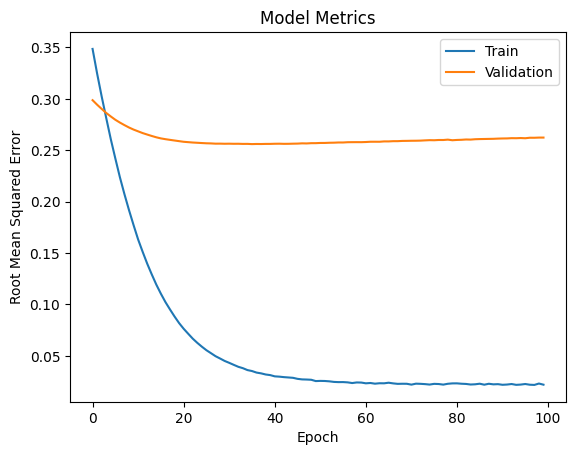

In [ ]:

# Plot training metrics
plt.plot(history.history['root_mean_squared_error'], label='Train')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation')
plt.title('Model Metrics')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Generate book recommendations
def get_book_recommendations(user_id, top_n=10):
    user_encoder = user_to_user_encoded.get(user_id)
    if user_encoder is None:
        return []
    books_not_read = list(set(book_to_book_encoded.values()) - set(filtered_data[filtered_data['User_ID'] == user_id]['book'].values))
    user_book_array = np.array([[user_encoder, book] for book in books_not_read])
    ratings = model1.predict(user_book_array).flatten()
    top_indices = ratings.argsort()[-top_n:][::-1]
    return [book_encoded_to_book[books_not_read[i]] for i in top_indices]

In [ ]:
# Example recommendation
sample_user = filtered_data["User_ID"].sample(3).iloc[0]
recommended_books = get_book_recommendations(sample_user)
print("Recommended books for user", sample_user, ":", recommended_books)

3/3 [==============================] - 0s 4ms/step
Recommended books for user 95359 : ['STONES FROM THE RIVER', "Where the Heart Is (Oprah's Book Club (Paperback))", "The Bonesetter's Daughter", "Harry Potter and the Sorcerer's Stone (Book 1)", 'The Joy Luck Club', 'A Painted House', 'Bridget Jones: The Edge of Reason', 'The Client', "Angela's Ashes (MMP) : A Memoir", "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"]
